# Omdena Liverpool Chapter - Predicting RTC Severity

## Project Overview  
Over the last few years improvements to roads in the UK have been implemented across the country in order to create a safer roading system with some great effect.  
However there still seems to be a rise in severe and fatal accidents.  
Using datasets from the Department of Transport, we hope to be able to uncover the probability of the severity of an accident.  
Using the following techniques we will develop and deploy a machine learning model to predict RTC severity:
- Preprocessing
- Exploratory Data Analysis
- Feature Engineering
- Modeling
- Machine Learning
  
The project has been broken down into six pipelines:
1. Data Engineering
2. Group 1 Predicting RTC Severity
3. Group 2 Geospatial Heatmap
4. Group 3 Time Series Analysis
5. Group 4 Vehicle Analysis and Predictions
6. Solution Deployment
  
**Pipeline 1** prepares the datasets for groups 1 - 4  
  
**Pipelines 2 - 5** will run concurrently and have three tasks:
- EDA
- Feature Engineering
- Model Development and Evaluation
  
**Pipeline 6** will bring together the models and create the solution to be deployed.  
  
Each Pipeline will produce a Jupyter notebook for their task, each being passed on to the next task until completion of all three tasks.  
The notebooks will be published on the Omdena Liverpool GitHub site.  
  
This is my attempt at **Pipeline 2 Predicting RTC Severity EDA**.

## Predicting RTC Severity - EDA

Group 1 is tasked with predicting the road traffic collision severity using a dataset from the department of transport consisting of over a million rows and 34 columns dating from 2005 to 2010.

### Features
```
Accident_Index
1st_Road_Class
1st_Road_Number
2nd_Road_Class
2nd_Road_Number
Accident_Severity
Carriageway_Hazards
Date
Day_of_Week
Did_Police_Officer_Attend_Scene_of_Accident
Junction_Control
Junction_Detail
Latitude
Light_Conditions
Local_Authority_(District)
Local_Authority_(Highway)
Location_Easting_OSGR
Location_Northing_OSGR
Longitude
LSOA_of_Accident_Location
Number_of_Casualties
Number_of_Vehicles
Pedestrian_Crossing-Human_Control
Pedestrian_Crossing-Physical_Facilities
Police_Force
Road_Surface_Conditions
Road_Type
Special_Conditions_at_Site
Speed_limit	Time
Urban_or_Rural_Area
Weather_Conditions
Year
InScotland
```
  
Each feature has its own subset, lets explore the dataset and evaluate the data.

Lets import the modules we will be using.

In [ ]:
# data manipulation
# conda install -c conda-forge pandas
import pandas as pd
# conda install -c conda-forge numpy
import numpy as np
# conda install -c conda-forge openpyxl
import openpyxl
# conda install -c conda-forge missingno
import missingno as msno

# data visualisation
# conda install -c conda-forge matplotlib
import matplotlib.pyplot as plt
from matplotlib import rcParams
# conda install -c conda-forge seaborn
import seaborn as sns

from datetime import datetime
import statistics

# apply some cool styling
plt.style.use("ggplot")
rcParams['figure.figsize'] = (12,  6)

#  For showing all columns in Pandas
pd.set_option('display.max_columns', None)

# this ignores the depreciation warnings etc
import warnings
warnings.filterwarnings("ignore")

Lets import the dataset using pandas `pd.read_parquet`, and have a quick look at some random rows.

In [ ]:
df_accident = pd.read_parquet('C:/Users/kmedr/My Drive/Omdena_Predicting_RTC_main/DATA/parquet/accident_data.parquet')

In [ ]:
# I like to use this method as it shows random rows.
df_accident.sample(n=10)

,Accident_Index,1st_Road_Class,1st_Road_Number,2nd_Road_Class,2nd_Road_Number,Accident_Severity,Carriageway_Hazards,Date,Day_of_Week,Did_Police_Officer_Attend_Scene_of_Accident,Junction_Control,Junction_Detail,Latitude,Light_Conditions,Local_Authority_(District),Local_Authority_(Highway),Location_Easting_OSGR,Location_Northing_OSGR,Longitude,LSOA_of_Accident_Location,Number_of_Casualties,Number_of_Vehicles,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Police_Force,Road_Surface_Conditions,Road_Type,Special_Conditions_at_Site,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Year,InScotland
227432,200604CK06206,A,570.0,None,0.0,Slight,None,27/10/2006,Friday,1.0,Data missing or out of range,Not at junction or within 20 metres,53.546572,Daylight,West Lancashire,Lancashire,343380.0,405890.0,-2.855993,E01025479,1,1,0.0,0.0,Lancashire,Dry,Single carriageway,None,60,07:20,Rural,None,2006,No
740270,2.00898E+12,A,75.0,None,0.0,Serious,None,31/03/2008,Monday,1.0,Data missing or out of range,Not at junction or within 20 metres,54.977365,Daylight,Dumfries and Galloway,Dumfries & Galloway,279220.0,566380.0,-3.888681,None,1,3,0.0,0.0,Dumfries and Galloway,Dry,Single carriageway,None,60,18:20,Rural,Fine no high winds,2008,Yes
171151,2.00553E+12,Motorway,5.0,None,0.0,Slight,None,29/07/2005,Friday,1.0,Not at junction or within 20 metres,Not at junction or within 20 metres,51.823655,Daylight,Stroud,Gloucestershire,385050.0,213920.0,-2.218335,E01022412,1,2,0.0,0.0,Gloucestershire,Dry,Dual carriageway,None,70,17:05,Rural,Fine no high winds,2005,No
47651,200506Q920569,None,0.0,C,0.0,Slight,None,08/02/2005,Tuesday,1.0,Give way or uncontrolled,T or staggered junction,53.515418,Darkness - lights lit,Oldham,Oldham,392090.0,402090.0,-2.120764,E01005440,1,2,0.0,0.0,Greater Manchester,Dry,Single carriageway,None,30,20:31,Rural,Fine no high winds,2005,No
940040,201006K033526,None,0.0,A,58.0,Slight,None,01/07/2010,Thursday,2.0,Give way or uncontrolled,T or staggered junction,53.579421,Daylight,Bolton,Bolton,375110.0,409270.0,-2.377408,E01004798,1,1,0.0,4.0,Greater Manchester,Dry,Single carriageway,None,30,09:50,Urban,Fine no high winds,2010,No
493772,200737B027989,A,143.0,None,NaN,Slight,None,16/05/2007,Wednesday,2.0,Give way or uncontrolled,Private drive or entrance,52.074995,Daylight,St. Edmundsbury,Suffolk,568160.0,244690.0,0.452343,E01030106,1,1,0.0,0.0,Suffolk,Wet or damp,Single carriageway,None,30,18:00,Urban,Raining no high winds,2007,No
603004,200805FF26925,A,561.0,None,0.0,Slight,None,04/08/2008,Monday,1.0,Data missing or out of range,Not at junction or within 20 metres,53.378240,Daylight,Liverpool,Liverpool,337090.0,387240.0,-2.947170,E01006628,1,2,0.0,4.0,Merseyside,Dry,Dual carriageway,None,30,15:55,Urban,Fine no high winds,2008,No
182774,2.00562E+12,None,0.0,B,4267.0,Slight,None,01/11/2005,Tuesday,1.0,Give way or uncontrolled,Private drive or entrance,51.472643,Darkness - lights lit,Cardiff,Cardiff,316860.0,175540.0,-3.198463,W01001759,1,2,0.0,1.0,South Wales,Dry,Single carriageway,None,30,16:50,Urban,Fine no high winds,2005,No
1003858,201042I211807,Motorway,25.0,None,0.0,Slight,None,03/07/2010,Saturday,1.0,Not at junction or within 20 metres,Not at junction or within 20 metres,51.668130,Daylight,Epping Forest,Essex,549160.0,198800.0,0.155514,E01021800,1,2,0.0,0.0,Essex,Dry,Dual carriageway,Roadworks,50,10:26,Rural,Fine no high winds,2010,No
745401,200901GD10623,A,107.0,B,113.0,Slight,None,24/09/2009,Thursday,2.0,Auto traffic signal,T or staggered junction,51.545730,Darkness - lighting unknown,Hackney,Hackney,534960.0,184780.0,-0.055082,E01001731,1,2,0.0,5.0,Metropolitan Police,Dry,Single carriageway,None,30,05:15,Urban,Fine no high winds,2009,No


Lets check for missing data.

<AxesSubplot: >

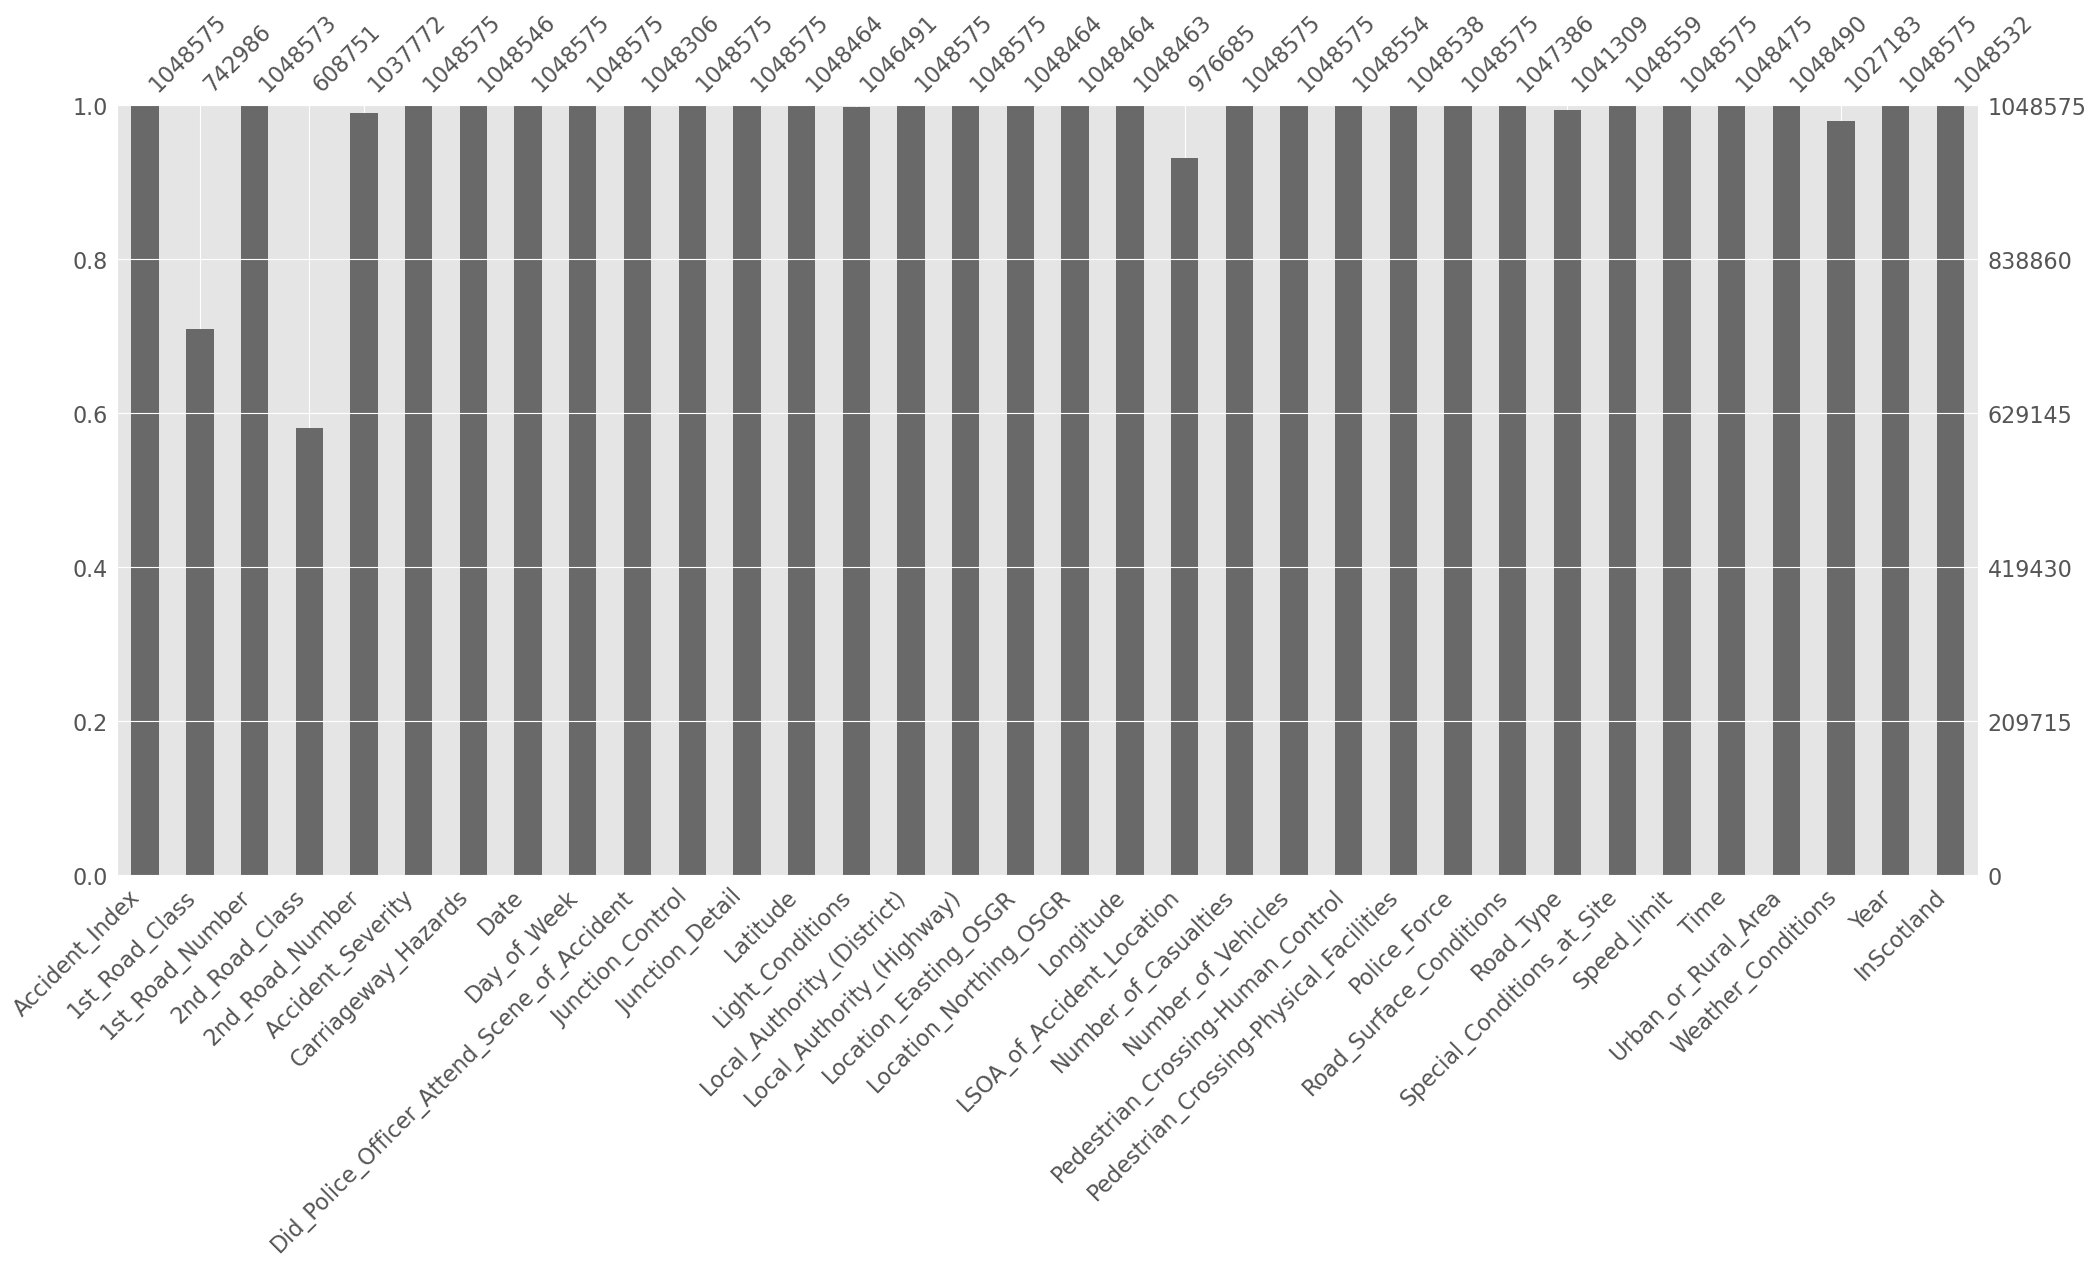

In [ ]:
msno.bar(df_accident)

Lets take a look at the columns with the most missing data.

In [ ]:
print('1st_Road_Class''\n', f"Unique Values: {df_accident['1st_Road_Class'].nunique()}, \n{df_accident['1st_Road_Class'].unique()}", '\n')
print('2nd_Road_Class''\n', f"Unique Values: {df_accident['2nd_Road_Class'].nunique()}, \n{df_accident['2nd_Road_Class'].unique()}", '\n')
print('LSOA_of_Accident_Location''\n', f"Unique Values: {df_accident['LSOA_of_Accident_Location'].nunique()}, \n{df_accident['LSOA_of_Accident_Location'].unique()}")

1st_Road_Class
 Unique Values: 5, 
['A' 'B' 'C' None 'Motorway' 'A(M)'] 

2nd_Road_Class
 Unique Values: 6, 
[None 'C' 'Unclassified' 'B' 'A' 'Motorway' 'A(M)'] 

LSOA_of_Accident_Location
 Unique Values: 34226, 
['E01002849' 'E01002909' 'E01002857' ... 'W01001488' 'W01001386'
 'W01001123']


After investigating 1st_ and 2nd_Road_Class features we found that in the  
Police form it shows us that there is two options which are very similar:  
  
<img src="https://drive.google.com/file/d/1FouZX7NQILKLBoGZCrY-ZCpHqjSlLl1-/view?usp=sharing" alt="Police Form" />
  
- `Not Known`
- `Unclassified`
  
`Not Known` would indicate that the Police Officer does not know the road classification.  
`Unclassified` relates to a road of no classification, a side road or housing estate road.  
It would be logical to believe that there must a `1st_Road_Class`, therefore the  
`1st_Road_Class`, `None` value represents an `Unclassified` road or a `Not Known` road.  
  
The `2nd_Road_Class` `None` value represents that only one road was involved.
  
Lets replace the values in `1st_Road_Class` with `Unclassified Road` and `2nd_Road_Class`.  
with `No 2nd Road`  
We will change `Weather_Conditions` with `Unknown`.
  
Lets remove columns that are not required for EDA.  
`The 1st_Road_Number`, `2nd_Road_Number` and `LSOA_of_Accident_Location` are not required for the EDA.

In [53]:
# df_accident.dropna(subset=['Carriageway_Hazards', 'Road_Surface_Conditions', 'Road_Type', 'Special_Conditions_at_Site', 'Latitude', 'Longitude', 'Light_Conditions', 'Pedestrian_Crossing-Human_Control', 'Time', 'Urban_or_Rural_Area', 'Pedestrian_Crossing-Physical_Facilities'], inplace=True)
df_accident['Weather_Conditions'].replace(np.NaN, 'Unknown', inplace=True)
df_accident['1st_Road_Class'].replace(np.NaN, 'Unclassified Road', inplace=True)
df_accident['1st_Road_Number'].replace(np.NaN, 'Unknown', inplace=True)
df_accident['2nd_Road_Class'].replace(np.NaN, 'No 2nd Road', inplace=True)
df_accident['2nd_Road_Number'].replace(np.NaN, 'Unknown', inplace=True)
df_accident['Road_Type'].replace(np.NaN, 'Unknown', inplace=True)

In [54]:
df_accident.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048569 entries, 0 to 1048568
Data columns (total 34 columns):
 #   Column                                       Non-Null Count    Dtype  
---  ------                                       --------------    -----  
 0   Accident_Index                               1048569 non-null  object 
 1   1st_Road_Class                               1048569 non-null  object 
 2   1st_Road_Number                              1048569 non-null  object 
 3   2nd_Road_Class                               1048569 non-null  object 
 4   2nd_Road_Number                              1048569 non-null  object 
 5   Accident_Severity                            1048569 non-null  object 
 6   Carriageway_Hazards                          1048540 non-null  object 
 7   Date                                         1048569 non-null  object 
 8   Day_of_Week                                  1048569 non-null  object 
 9   Did_Police_Officer_Attend_Scene_of_Accident  1

In [51]:
print('Road_Surface_Conditions''\n', f"Unique Values: {df_accident['Road_Surface_Conditions'].nunique()}, \n{df_accident['Road_Surface_Conditions'].unique()}", '\n')
print('Road_Type''\n', f"Unique Values: {df_accident['Road_Type'].nunique()}, \n{df_accident['Road_Type'].unique()}", '\n')

Road_Surface_Conditions
 Unique Values: 5, 
['Wet or damp' 'Dry' 'Frost or ice' 'Snow' 'Flood over 3cm. deep' None] 

Road_Type
 Unique Values: 5, 
['Single carriageway' 'Dual carriageway' 'One way street' 'Roundabout'
 'Slip road' None] 



In [56]:
df_accident.drop(['Accident_Index', 'Location_Northing_OSGR', 'Location_Easting_OSGR', 'LSOA_of_Accident_Location', '1st_Road_Number', '2nd_Road_Number', 'Did_Police_Officer_Attend_Scene_of_Accident', 'InScotland'], axis=1, inplace=True)  

Lets check for nulls and remove all rows from columns that have less than 2% null values.

In [63]:
# columns having null values < 2%
null_values = df_accident.isnull().sum().sort_values(ascending=False)
nulls = null_values[null_values != 0] / df_accident.shape[0] * 100
dropnulls = nulls[nulls < 2].index.tolist()
print(f'Columns containing less than 2% NaNs:', '\n\n', dropnulls)
print(f'\n', 'Rows and columns:', df_accident.shape)

Columns containing less than 2% NaNs: 

 ['Light_Conditions', 'Road_Surface_Conditions', 'Longitude', 'Latitude', 'Time', 'Urban_or_Rural_Area', 'Pedestrian_Crossing-Physical_Facilities', 'Carriageway_Hazards', 'Pedestrian_Crossing-Human_Control', 'Special_Conditions_at_Site']

 Rows and columns: (1048569, 26)


In [64]:
# Droping null values  and reset index
for column in dropnulls:
  df_accident.drop(df_accident[df_accident[column].isnull()].index.tolist(), inplace=True)
  df_accident.reset_index(inplace=True, drop=True)

In [65]:
df_accident.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1045003 entries, 0 to 1045002
Data columns (total 26 columns):
 #   Column                                   Non-Null Count    Dtype  
---  ------                                   --------------    -----  
 0   1st_Road_Class                           1045003 non-null  object 
 1   2nd_Road_Class                           1045003 non-null  object 
 2   Accident_Severity                        1045003 non-null  object 
 3   Carriageway_Hazards                      1045003 non-null  object 
 4   Date                                     1045003 non-null  object 
 5   Day_of_Week                              1045003 non-null  object 
 6   Junction_Control                         1045003 non-null  object 
 7   Junction_Detail                          1045003 non-null  object 
 8   Latitude                                 1045003 non-null  float64
 9   Light_Conditions                         1045003 non-null  object 
 10  Local_Authority_(D

Lets check for and remove any duplicate rows.

In [ ]:
# Number of duplicated rows
print(f'Number of duplicated rows:', df_accident.duplicated().sum())
print(f'Rows and columns:', df_accident.shape)

Number of duplicated rows: 6
Rows and columns: (1048575, 34)


In [ ]:
# drop duplicated rows and reset index
df_accident.drop_duplicates(inplace=True)
df_accident.reset_index(inplace=True, drop=True)
print(f'Number of duplicated rows:', df_accident.duplicated().sum())
print(f'Rows and columns:', df_accident.shape)

Number of duplicated rows: 0
Rows and columns: (1048569, 34)


In [66]:
df_accident.columns[df_accident.isnull().any()]

Index([], dtype='object')

<AxesSubplot: >

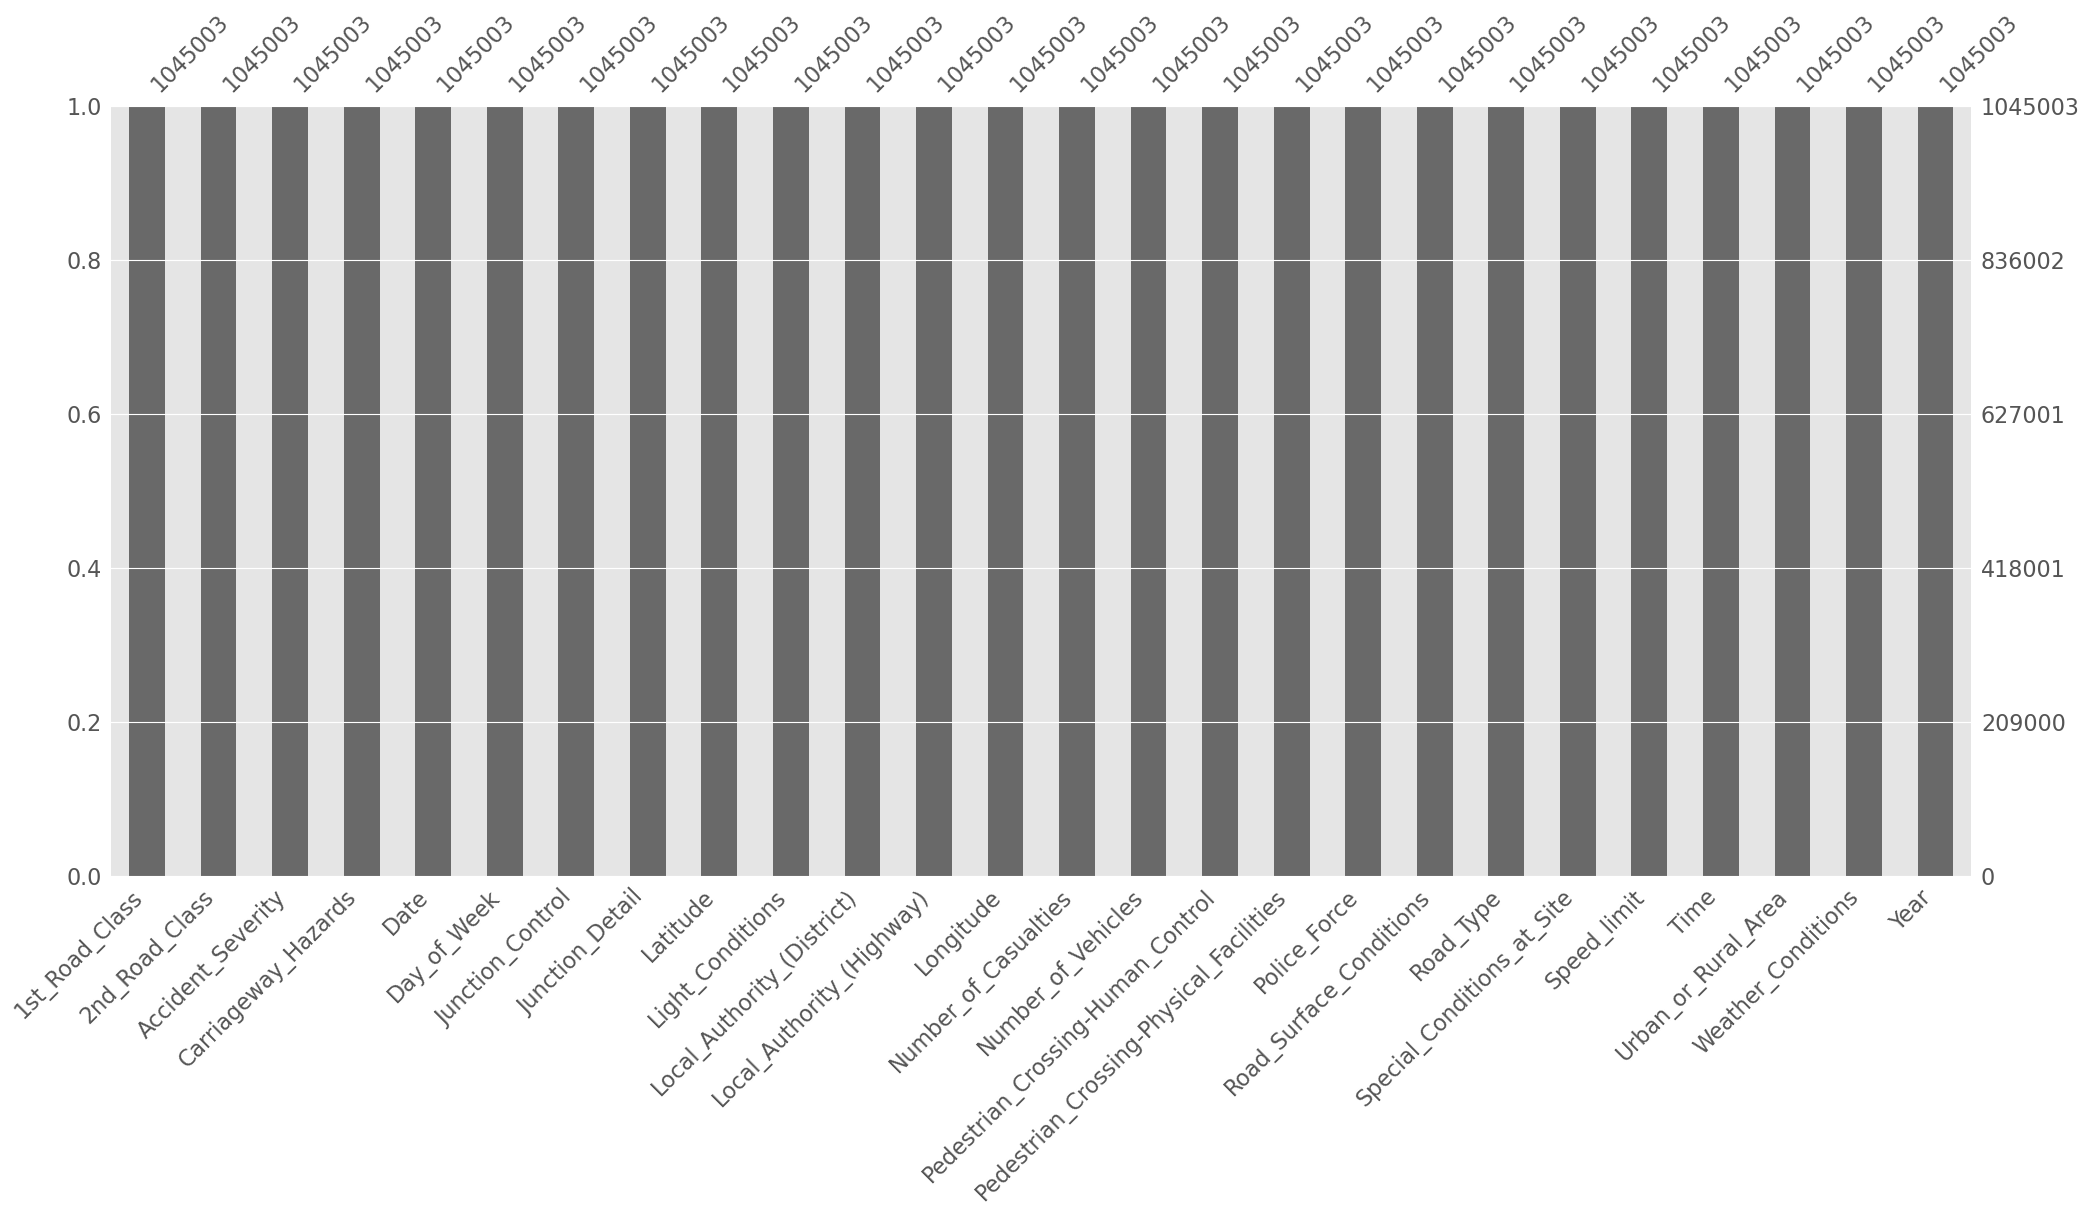

In [67]:
msno.bar(df_accident)

In [68]:
df_accident.shape

(1045003, 26)